In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


/opt/anaconda3/envs/Stats/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified


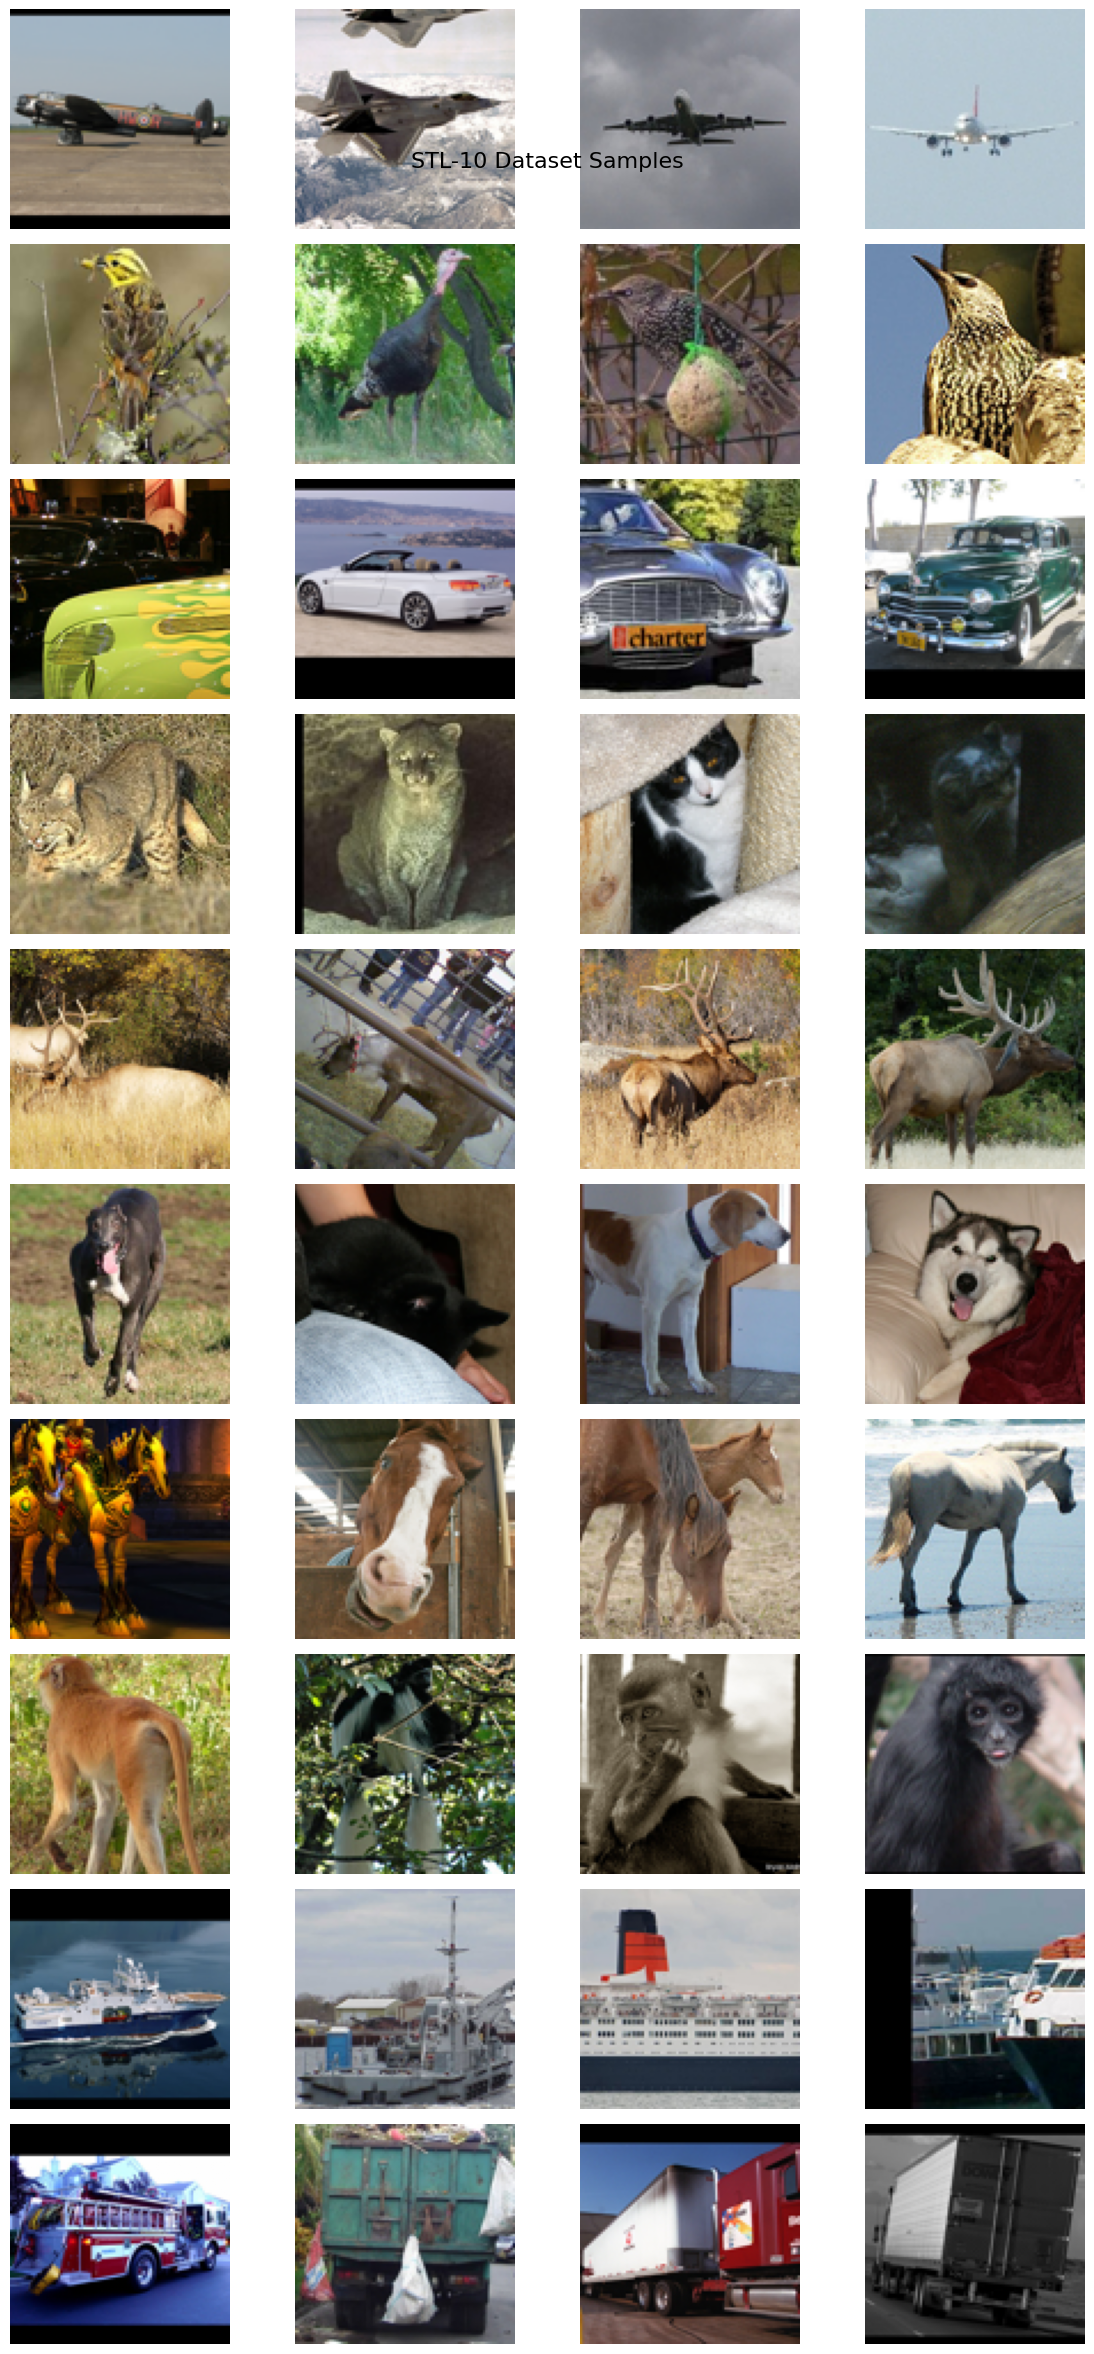

In [2]:

# Load STL-10 dataset
transform = transforms.ToTensor()
train_dataset = datasets.STL10(root="./data", split="train", download=True, transform=transform)

# Get class names
class_names = train_dataset.classes

# Create a dictionary to hold samples for each class
class_samples = {class_name: [] for class_name in class_names}

# Collect 4 samples per class
for img, label in train_dataset:
    class_name = class_names[label]
    if len(class_samples[class_name]) < 4:
        class_samples[class_name].append(img)
    if all(len(samples) == 4 for samples in class_samples.values()):
        break

# Plot the samples
fig, axes = plt.subplots(10, 4, figsize=(12, 24))
fig.suptitle("STL-10 Dataset Samples", fontsize=16, y=0.92)

for i, (class_name, samples) in enumerate(class_samples.items()):
    for j, img in enumerate(samples):
        axes[i, j].imshow(img.permute(1, 2, 0))  # Convert from CxHxW to HxWxC
        axes[i, j].axis("off")
    axes[i, 0].set_ylabel(class_name, fontsize=12, labelpad=10)

plt.tight_layout()
plt.show()
